In [0]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

#Encode label
label2id = {
    'Animal': 0,
    'Art': 1,
    'Cosmetics': 2,
    'Fashion': 3,
    'Food': 4,
    'Games': 5,
    'Machine': 6,
    'Music': 7,
    'Sports': 8,
    'Landscape': 9,
    'Vehicle': 10
}

#Load data and label:
def read_data(label2id, path_link):
    X = []
    Y = []
    for label in os.listdir(path_link):
        dir = os.path.join(path_link, label)
        dir = dir + '/'
        for image in os.listdir(dir):
            img = cv2.imread(os.path.join(dir, image))
            # img = cv2.resize(img, (96, 96))
            X.append(img)
            Y.append(label2id[label])
    return X, Y

# Load data
train_link = 'Dataset/train/'
test_link = 'Dataset/test/'
val_link = 'Dataset/validation/'

X_train, Y_train = read_data(label2id, train_link)
X_test, Y_test = read_data(label2id, test_link)
X_val, Y_val = read_data(label2id, val_link)


In [0]:
#Chuan hoa du lieu ve khoang [0, 1]
X_train = np.array(X_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)
X_val = np.array(X_val, dtype=np.float32)

X_train /= 255.0
X_test /= 255.0
X_val /= 255.0

In [0]:
#Data shape
print("Data shape:")
print("X_train:" + str(X_train.shape))
print("X_validation:" + str(X_val.shape))
print("X_test:" + str(X_test.shape))


Data shape:
X_train:(19057, 32, 32, 3)
X_validation:(4247, 32, 32, 3)
X_test:(550, 32, 32, 3)


In [0]:
#Shuffle du lieu de du lieu khong bi tap trung tung doan
from sklearn.utils import shuffle

X_train, Y_train = shuffle(X_train, Y_train)
X_val, Y_val = shuffle(X_val, Y_val)

In [0]:
#Vecto hoa label thanh vecto 11 chieu
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_val = lb.fit_transform(Y_val)
Y_test = lb.fit_transform(Y_test)

Y_train.shape[1:]

(11,)

In [0]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten, Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD

In [0]:
#Define
shape = X_train.shape[1:]
epochs = 75
batch_size = 64
lr = 0.02
classes = 11

In [0]:
#Xay dung model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=shape))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(classes))
model.add(Activation('softmax'))

In [0]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_30 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_31 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_26 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 32)      

In [0]:
#Opt: SGD voi momentum = 0.9, learning_rate = 0.02
opt = SGD(learning_rate=lr, momentum=0.9)
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

In [0]:
#Training
print("Start training")
M = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, shuffle=True)

Start training
Epoch 1/75
298/298 [==============================] - 2s 8ms/step - loss: 2.3854 - accuracy: 0.2916
Epoch 2/75
298/298 [==============================] - 2s 8ms/step - loss: 2.1007 - accuracy: 0.3302
Epoch 3/75
298/298 [==============================] - 2s 8ms/step - loss: 1.9081 - accuracy: 0.3740
Epoch 4/75
298/298 [==============================] - 2s 8ms/step - loss: 1.7893 - accuracy: 0.4081
Epoch 5/75
298/298 [==============================] - 2s 8ms/step - loss: 1.7089 - accuracy: 0.4240
Epoch 6/75
298/298 [==============================] - 2s 8ms/step - loss: 1.6401 - accuracy: 0.4448
Epoch 7/75
298/298 [==============================] - 2s 8ms/step - loss: 1.5713 - accuracy: 0.4684
Epoch 8/75
298/298 [==============================] - 2s 8ms/step - loss: 1.5118 - accuracy: 0.4926
Epoch 9/75
298/298 [==============================] - 2s 8ms/step - loss: 1.4649 - accuracy: 0.5018
Epoch 10/75
298/298 [==============================] - 2s 8ms/step - loss: 1.4060 - a

In [0]:
#Save model
model.save("MyModel.h5")

Predict: Sports


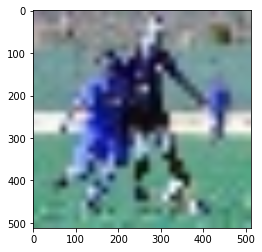

In [0]:
#Thu predict
result = model.predict(X_test[451:452])

final = np.argmax(result)
for key, value in label2id.items():
  if value == final:
    print("Predict: " + key)

#Show
img = X_test[451]
img = cv2.resize(img, (512, 512))
plt.imshow(img)

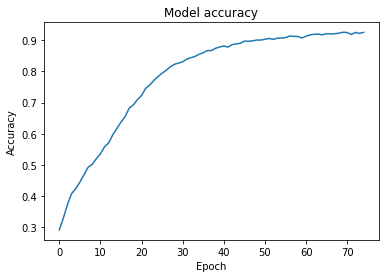

In [0]:
#Show do thi Acc
plt.plot(M.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()